# bunching estimation using the real data

take concept from simulation

In [1]:
# load packages

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from scipy.optimize import fsolve
from scipy import integrate
from sympy import symbols
import tools # this imports the file tools.py // must be in the same folder as the current file


In [2]:
# define parameters
pi = 250
phi = 50
phi120 = 100

In [38]:
# load data
wd = Path.cwd()
file = 'stata/Outages_{period}.dta'
data = pd.read_stata(wd.parent/file)
print(data.columns)

# keep relevant columns
data = data[['date', 'duration_minutes', 'discom', 'planned']]

# keep only unplanned
data = data.loc[data.planned != 'planned',]

# keep year 2019
data = data[data.apply(lambda row: row.date.year == 2019, axis=1)]

# keep one firm
#data = data.loc[data.discom == 'tata',]
data

Index(['division_name', 'id', 'area_affected', 'noofcustomersaffected',
       'capacity', 'duration', 'unservedmuduetooutage', 'date', 'end_date',
       'start_date', 'end_time', 'start_time', 'hour_of_day',
       'duration_seconds', 'duration_minutes', 'duration_hours', 'discom',
       'planned', 'industrial', 'school', 'hospital', 'dairy', 'residential',
       'minute_of_day', 'q', 'quarter', 'hourly'],
      dtype='object')


,date,duration_minutes,discom,planned
0,2019-12-02,43.0,brpl,0.0
1,2019-12-03,9.0,brpl,0.0
2,2019-12-05,57.0,brpl,0.0
3,2019-12-06,37.0,brpl,0.0
4,2019-12-06,33.0,brpl,0.0
...,...,...,...,...
132655,2019-11-29,29.0,tata,0.0
132662,2019-11-30,45.0,tata,0.0
132663,2019-11-30,54.0,tata,0.0
132664,2019-11-30,55.0,tata,0.0


(0.0, 500.0)

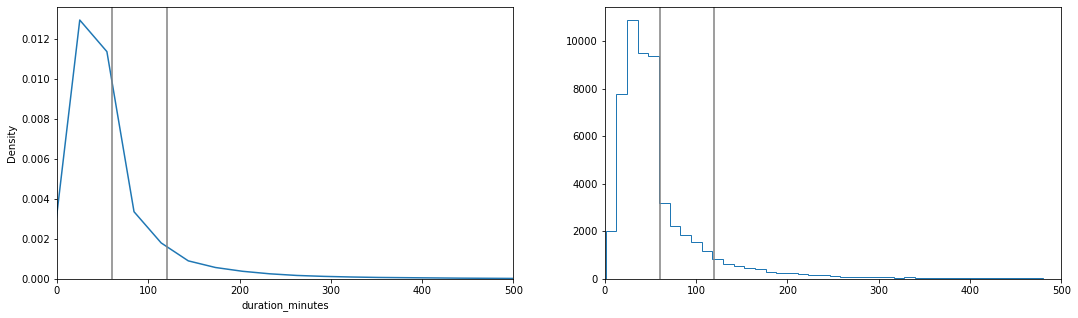

In [22]:
xmax  = 500

fig, axs = plt.subplots(1,2,figsize=(18,5))
sns.kdeplot(data.duration_minutes, ax = axs[0])
axs[0].axvline(60, color  = 'grey')
axs[0].axvline(120, color  = 'grey')
axs[0].set_xlim(0,xmax)

axs[1].hist(data.duration_minutes, histtype = 'step', bins = xmax)
axs[1].axvline(60, color  = 'grey')
axs[1].axvline(120, color  = 'grey')
axs[1].set_xlim(0,xmax)

## estimation

In [33]:
# bunching at x = 60
bsize = 3
ex_reg = 3
z_lower60 = 60 - ex_reg * bsize
missing60 = 60 + bsize*26

bunch60 = tools.bunching(data.duration_minutes, bsize = bsize, xmax= 90, xmin= 10, z_upper= 60, z_lower= z_lower60, missing = missing60, ex_reg= ex_reg, poly_dgr=4 )


display(bunch60.estimation_res())

print('deltaX:', bunch60.get_deltaX(), 'mX:', bunch60.get_mX())

pred60 = bunch60.prediction()

print('total bunching',bunch60.total_bunch())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   nobs   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     316.7
Date:                Thu, 09 Sep 2021   Prob (F-statistic):           9.72e-19
Time:                        14:06:28   Log-Likelihood:                -160.36
No. Observations:                  27   AIC:                             334.7
Df Residuals:                      20   BIC:                             343.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2552.1252    419.261     -6.087      0.000   -3426.688   -1677.562
duration     396.5298     46.027      8.615      0.000     300.519     492.540
duration2    -10.1520      1.683     -6.033      0.000     -13.662      -6.642
duration3      0.1027      0.025      4.112      0.001       0.051       0.155
duration4     -0.0004      0.000     -2.898      0.009      -0.001      -0.000
b            -11.0100    112.191     -0.098      0.923    -245.035     223.015
m          -1171.1007    181.407     -6.456      0.000   -1549.510    -792.692
==============================================================================
Omnibus:                        7.416   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                5.738
Skew:                          -0.811   Prob(JB):                       0.0568
Kurtosis:                       4.571   Cond. No.                     5.10e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.1e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

deltaX: -0.04484380234603539 mX: -5.866255990965022
total bunching -0.046838029257374625


In [34]:
# bunching at x = 120
bsize = 3
ex_reg = 3
z_lower120 = 120 - ex_reg * bsize
missing120 = 120 + bsize*26

# define bins

bunch120 = tools.bunching(data.duration_minutes, bsize = bsize, xmax= 200, xmin= 100, z_upper= 200, z_lower= z_lower120, missing = missing120, ex_reg= ex_reg, poly_dgr=4 )


display(bunch120.estimation_res())

print('deltaX:', bunch120.get_deltaX())

pred120 = bunch120.prediction()

print('total bunching',bunch120.total_bunch())

C:\Users\paula\anaconda3\envs\dehli\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   nobs   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     89.33
Date:                Thu, 09 Sep 2021   Prob (F-statistic):           6.29e-16
Time:                        14:06:30   Log-Likelihood:                -150.93
No. Observations:                  33   AIC:                             313.9
Df Residuals:                      27   BIC:                             322.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7068.7660   5618.512      1.258      0.219   -4459.469    1.86e+04
duration    -142.7929    152.346     -0.937      0.357    -455.381     169.795
duration2      1.0767      1.529      0.704      0.487      -2.060       4.214
duration3     -0.0035      0.007     -0.521      0.606      -0.017       0.010
duration4   4.112e-06   1.11e-05      0.372      0.713   -1.86e-05    2.68e-05
b             53.4108     33.579      1.591      0.123     -15.488     122.309
m                   0          0        nan        nan           0           0
==============================================================================
Omnibus:                        8.356   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                9.804
Skew:                           0.583   Prob(JB):                      0.00743
Kurtosis:                       5.402   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

deltaX: 5.558101315720053
total bunching 2.900848107911491


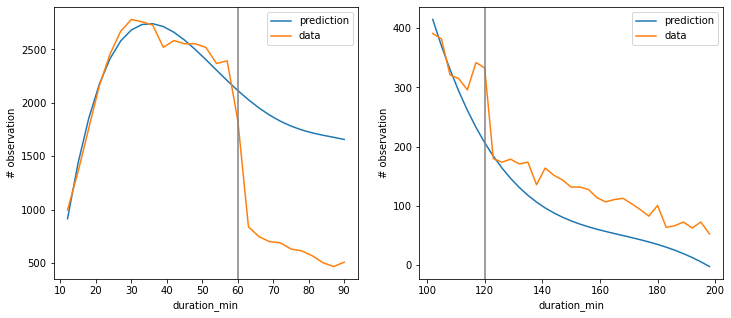

In [35]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].plot(pred60.duration, pred60.y_pred, label = 'prediction')
ax[0].plot(pred60.duration, pred60.nobs, label = 'data')
ax[0].set_xlabel('duration_min')
ax[0].set_ylabel(r'# observation')
ax[0].axvline(60, color= 'grey')
ax[0].legend()    

ax[1].plot(pred120.duration, pred120.y_pred, label = 'prediction')
ax[1].plot(pred120.duration, pred120.nobs, label = 'data')
ax[1].set_xlabel('duration_min')
ax[1].set_ylabel(r'# observation')
ax[1].axvline(120, color= 'grey')
ax[1].legend() 

In [37]:
### solve for alpha
a = symbols('a')
delta_x = bunch60.get_deltaX()
def sigmaI(a):
    return (60 + delta_x)*(pi)**(1/(1+a))

def  xI(a):
    return  sigmaI(a) * (pi+phi)**(-1/(1+a))

def L(a):
    return tools.K(xI(a), sigmaI(a), pi=pi, phi=phi, phi120 = phi,alpha=a)
    

def R(a):
    return pi*60 + tools.C(60, sigmaI(a), a) 

def solution(a):
    return L(a) - R(a)
res = fsolve(solution, 1)
print(res)

[258.49688134]
